# 一，曲线拟合的常用方法和关系

曲线拟合(Curve Fitting)的数学定义是指用连续曲线近似地刻画或比拟平面上一组离散点所表示的坐标之间的函数关系，是一种用解析表达式逼近离散数据的方法。推求一个解析函数y=f(x)使其通过或近似通过有限序列的资料点(xi，yi)，通常用多项式函数通过最小二乘法求得此拟合函数。

**曲线拟合一般方法：**

* 线性模型：用解析表达式逼近离散数据的方法

* 非线性模型：求解非线性方程组或用最优化方法

**衡量拟合优度的标准：**
最常用的一种做法是选择参数c使得拟合模型与实际观测值在各点的残差(或离差)$ek=yk－f(xk，c)$的加权平方和达到最小，此时所求曲线称作在加权最小二乘意义下对数据的拟合曲线。

 MLE：假设每个观察到的样本数据点的函数值的 t 是一个以真实的函数 y(x, w)均值的高斯 分布产生的。然后求使似然最大的参数值 w，即完成参数估计。   
 
 MAP：与 MLE 类似，不过是求解使后验概率最大的参数值 w。   
 
 minimize the sum of squares of error with regularizer：往无 regularizer 的 E(w)加入一个 regularizer，例如：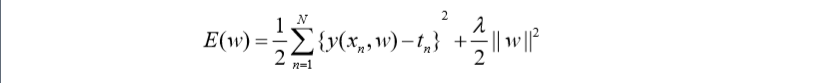
 
 在以上问题中： MLE 等价于 minimize the sum of squares of error   MAP 等价于 minimize the sum of squares of error with regularizer (MAP with Gaussian prior) 

## 用代码实现部分曲线拟合

1.线性拟合 $Y=αX+β$：

In [1]:
def f_1(self, x, A, B):
    return A * x + B

2.多项式拟合（二次）$Y=αX^2+βX+γ$：

In [2]:
def f_2(self, x, A, B, C):
    return A * x * x + B * x + C

3.多项式拟合（三次）$Y=αX^3+βX^2+γX+θ$：

In [3]:
def f_3(self, x, A, B, C, D):
    return A * x * x * x + B * x * x + C * x + D

4.指数拟合 $Y=αln(x)+β$：

In [4]:
def f_ln(self, x, A, B):
    return A * np.log(x) + B   

5.高斯拟合 $Y=α*exp((x-β)^2)/σ^2$：

In [5]:
def f_ln(self, x, A, B):
    return A * np.log(x) + B

In [17]:
import numpy as np
from scipy import optimize#使用了SCIPY的包用于拟合曲线
import math
class CruveFitting:
    def __init__(self, x_0, y_0, x_1):
        self.x_0 = x_0
        self.y_0 = y_0
        self.x_1 = x_1

    def f_1(self, x, A, B):
        return A * x + B

    # 二次曲线方程
    def f_2(self, x, A, B, C):
        return A * x * x + B * x + C
        
    # 三次曲线方程
    def f_3(self, x, A, B, C, D):
        return A * x * x * x + B * x * x + C * x + D

    def f_gauss(self, x, A, B, C, sigma):
        return A * np.exp(-(x - B) ** 2 / (2 * sigma ** 2)) + C

    def f_ln(self, x, A, B):
        return A * np.log(x) + B

    def Fitting(self, model="line"):#定义调用函数
        info = []

        if model is "line":
            A1, B1 = optimize.curve_fit(self.f_1, self.x_0, self.y_0)[0]
            info = [A1, B1]
            y_1 = A1 * self.x_1 + B1

        elif model is "square":
            A1, B1, C1 = optimize.curve_fit(self.f_2, self.x_0, self.y_0)[0]
            info = [A1, B1, C1]
            y_1 = A1 * self.x_1 * self.x_1 + B1*self.x_1 + C1

        elif model is "cube":
            A1, B1, C1, D1 = optimize.curve_fit(self.f_3, self.x_0, self.y_0)[0]
            info = [A1, B1, C1, D1]
            y_1 = A1 * self.x_1 * self.x_1 * self.x_1 + B1 * self.x_1 * self.x_1 + C1* self.x_1 + D1

        elif model is "gauss":
            A1, B1, C1, sigma = optimize.curve_fit(self.f_gauss, self.x_0, self.y_0)[0]
            info = [A1, B1, C1, sigma]
            y_1 = A1 * np.exp(-(self.x_1 - B1) ** 2 / (2 * sigma ** 2)) + C1

        elif model is "ln":
            A1, B1 = optimize.curve_fit(self.f_ln, self.x_0, self.y_0)[0]
            info = [A1, B1]
            y_1 = A1 * np.log(self.x_1) + B1

        return y_1, info

带入测试数据拟合

In [18]:
import numpy as np
import matplotlib.pyplot as plt

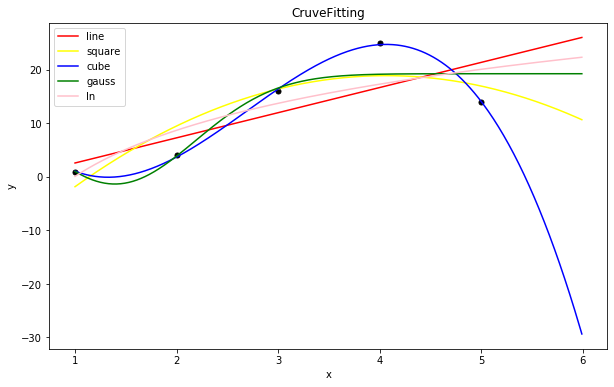

In [28]:
plt.figure(figsize=(10,6))

x0 = [1, 2, 3, 4, 5]
y0 = [1, 4, 16, 25, 14]
x1 = np.arange(1, 6, 0.01)
plt.scatter(x0[:], y0[:], 25, "black")

Fitting = CruveFitting(x0, y0, x1)

y_line, parameters_line = Fitting.Fitting(model="line")
y_square, parameters_square = Fitting.Fitting(model="square")
y_cube, parameters_cube = Fitting.Fitting(model="cube")
y_gauss, parameters_gauss = Fitting.Fitting(model="gauss")
y_ln, parameters_ln = Fitting.Fitting(model="ln")

plt.plot(x1, y_line, "red",label = "line")
plt.plot(x1, y_square, "yellow",label = "square")
plt.plot(x1, y_cube, "blue",label = "cube")
plt.plot(x1, y_gauss, "green",label = "gauss")
plt.plot(x1, y_ln, "pink",label = "ln")

plt.title("CruveFitting")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 二：什么是线性模型

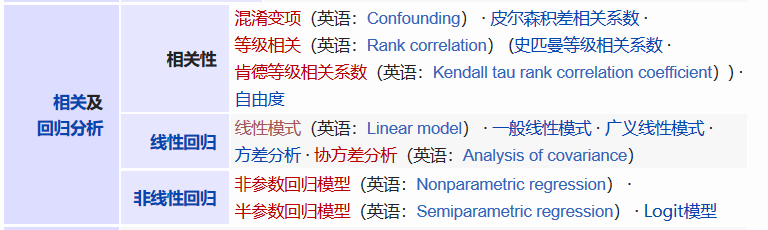
**linear model**：是一类统计模型的总称，制作方法是用一定的流程将各个环节连接起来，包括线性回归模型、方差分析模型。

**一般线性模型**（general linear model, multivariate regression model）：是一个统计学上常见的线性模型。其公式一般写为：$Y = X B + U$
其中Y是一个包含反应变量的矩阵。X是一个包含独立自变量的设计矩阵。B是一个包含多个估计参数的矩阵。U 是一个包含误差和剩余项的矩阵。通常假设误差在测量之间是不相关的，并遵循多元正态分布。如果误差不遵循多元正态分布，则可以使用广义线性模型来放宽关于Y和U的假设。

**广义线性模型**(Generalized linear model、简称GLM) 是一种应用灵活的线性回归模型。该模型允许因变量的偏差分布有除了正态分布之外的其它分布。此模型假设实验者所量测的随机变量的分布函数与实验中系统性效应(即非随机的效应)可经由一链接函数（link function）建立起可资解释其相关性的函数。 

广义线性模型是简单最小二乘回归（OLS）的扩展，在广义线性模式中，假设每个资料的观测值 Y 来自某个指数族分布。 该分布的平均数 μ 可由与该点独立的X解释：
$ E ⁡ ( y ) = μ = g − 1 ( X β ) $

其中 E ( y ) 为 y 的期望值， X 是由未知待估计参数 β 与已知变量 X 构成的线性估计式， g则为链接函数。
在此模式下， y 的方差 V 可表示为：
$Var ⁡ ( y ) = V ⁡ ( μ ) = V ⁡ ( g − 1 ( X β ) )$

一般假设 V 可视为一指数族随机变量的函数。未知参数 β 通常会以最大概似估计量, 殆最大概似估计量, 或以贝氏方法来估计。 

# 三：算法得到最佳的回归预测函数

机器学习中所有的算法都需要最大化或最小化一个函数，这个函数被称为“目标函数”。其中，我们一般把最小化的一类函数，称为“损失函数”。它能根据预测结果，衡量出模型预测能力的好坏。

在实际应用中，选取损失函数会受到诸多因素的制约，比如是否有异常值、机器学习算法的选择、梯度下降的时间复杂度、求导的难易程度以及预测值的置信度等等。因此，不存在一种损失函数适用于处理所有类型的数据。
损失函数大致可分为两类：分类问题的损失函数和回归问题的损失函数。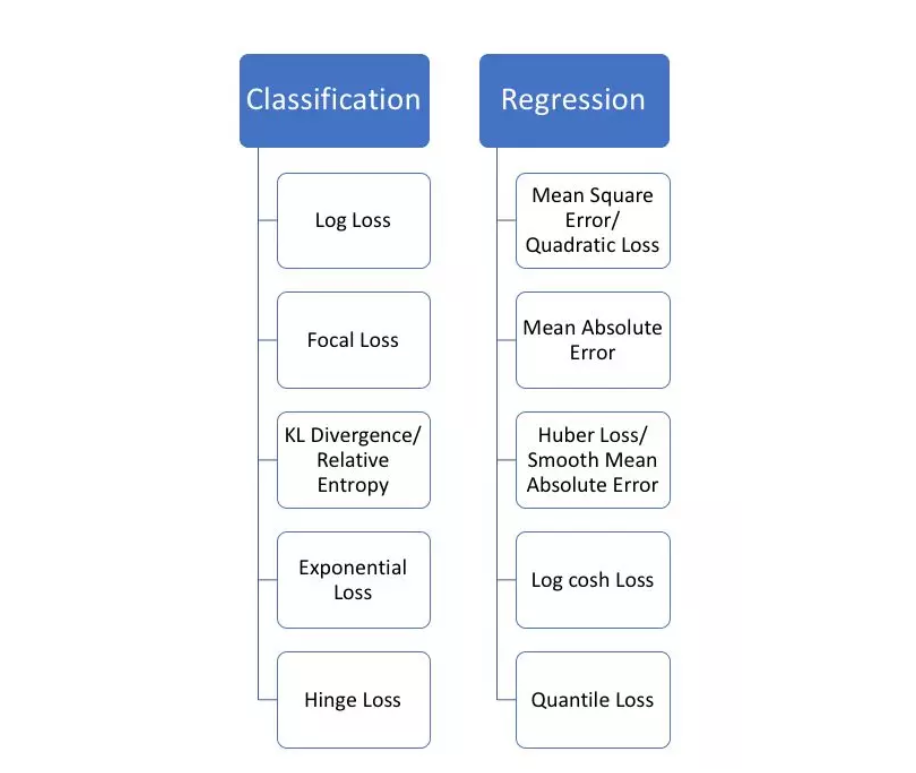

不同种类的回归损失函数以及它们的作用:

**均方误差 Mean Square Error (MSEL/2 Loss)**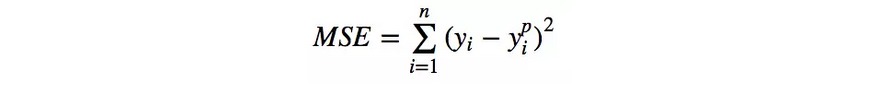均方误差(MSE)是最常用的回归损失函数，计算方法是求预测值与真实值之间距离的平方和

In [31]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def mse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sum((true - pred)**2)

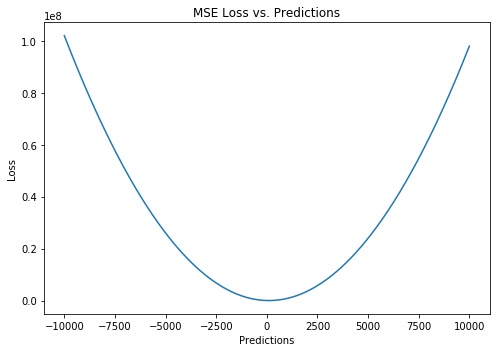

In [30]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_mse)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MSE Loss vs. Predictions")

fig.tight_layout()

上图是MSE函数的图像，其中目标值是100，预测值的范围从-10000到10000，Y轴代表的MSE取值范围是从0到正无穷，并且在预测值为100处达到最小。

**平均绝对值误差Mean Absolute Error （L1损失）**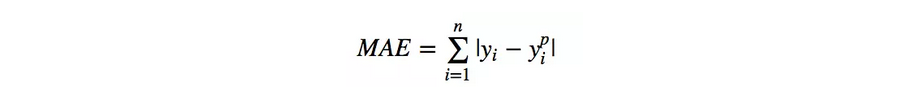
平均绝对误差（MAE）是另一种用于回归模型的损失函数。MAE是目标值和预测值之差的绝对值之和。其只衡量了预测值误差的平均模长，而不考虑方向，取值范围也是从0到正无穷（如果考虑方向，则是残差/误差的总和——平均偏差（MBE））。

In [32]:
def mae(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean absolute error loss
    """
    
    return np.sum(np.abs(true - pred))

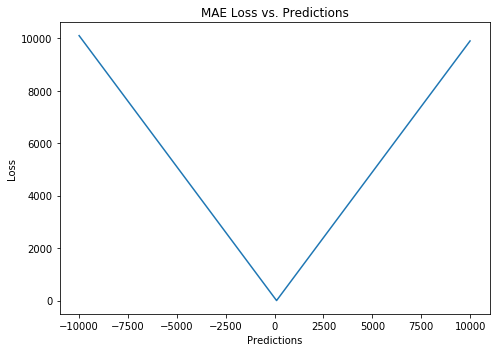

In [33]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_mae)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("MAE Loss vs. Predictions")

fig.tight_layout()

### MSE（L2损失）与MAE（L1损失）的比较

MSE对误差取了平方（令e=真实值-预测值），因此若e>1，则MSE会进一步增大误差。如果数据中存在异常点，那么e值就会很大，而e²则会远大于|e|。

因此，相对于使用MAE计算损失，使用MSE的模型会赋予异常点更大的权重。如果训练数据被异常点所污染，那么MAE损失就更好用。
如果我们最小化MSE来对所有的样本点只给出一个预测值，那么这个值一定是所有目标值的平均值。但如果是最小化MAE，那么这个值，则会是所有样本点目标值的中位数。众所周知，对异常值而言，中位数比均值更加鲁棒，因此MAE对于异常值也比MSE更稳定。

然而MAE存在一个严重的问题（特别是对于神经网络）：更新的梯度始终相同，也就是说，即使对于很小的损失值，梯度也很大。这样不利于模型的学习。为了解决这个缺陷，我们可以使用变化的学习率，在损失接近最小值时降低学习率。

**Huber损失Smooth Mean Absolute Error/ Huber Loss**：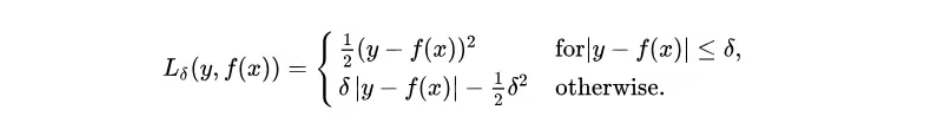
Huber损失对数据中的异常点没有平方误差损失那么敏感。它在0也可微分。本质上，Huber损失是绝对误差，只是在误差很小时，就变为平方误差。误差降到多小时变为二次误差由超参数δ（delta）来控制。当Huber损失在$[0-δ,0+δ]$之间时，等价为MSE，而在$[-∞,δ]$和$[δ,+∞]$时为MAE。

In [34]:
def sm_mae(true, pred, delta):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: smoothed mean absolute error loss
    """
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

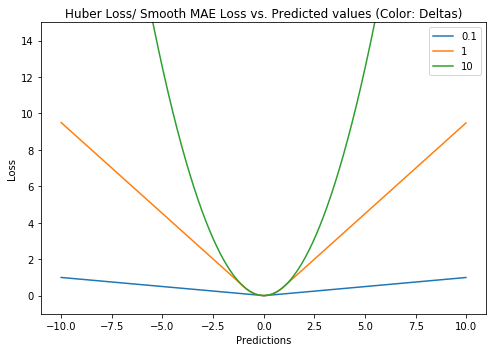

In [35]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

delta = [0.1, 1, 10]

losses_huber = [[sm_mae(target[i], pred[i], q) for i in range(len(pred))] for q in delta]

# plot 
for i in range(len(delta)):
    ax1.plot(pred, losses_huber[i], label = delta[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Huber Loss/ Smooth MAE Loss vs. Predicted values (Color: Deltas)")
ax1.legend()
ax1.set_ylim(bottom=-1, top = 15)

fig.tight_layout()

Huber损失会由于梯度的减小而落在最小值附近。比起MSE，它对异常点更加鲁棒。因此，Huber损失结合了MSE和MAE的优点。但是，Huber损失的问题是我们可能需要不断调整超参数delta。

# 四/五：模型复杂度，偏差和方差如何平衡

**随机误差**随机误差是数据本身的噪音带来的，这种误差是不可避免的。一般认为随机误差服从高斯分布，记作 $\epsilon\sim\mathcal N(0, \sigma_\epsilon)$。因此，若有变量 $y$ 作为预测值，以及 $X$ 作为自变量（协变量），那么我们将数据背后的真实规律 $f$ 记作

$$y = f(X) + \epsilon.$$

* 偏差（bias）描述的是通过学习拟合出来的结果之期望，与真实规律之间的差距，记作 $\text{Bias}(X) = E[\hat f(X)] - f(X)$。
* 方差（variance）即是统计学中的定义，描述的是通过学习拟合出来的结果自身的不稳定性，记作 $\text{Var}(X) = E\Bigl[\bigl(\hat f(X) - E[\hat f(X)]\bigr)^{2}\Bigr]$。

以均方误差为例，有如下推论

\begin{equation} \begin{aligned} \text{Err}(X) &{}= E\Bigl[\bigl(y - \hat f(X)\bigr)^2\Bigr] \\ &{}= E\Bigl[\bigl(f(X) + \epsilon - \hat f(X)\bigr)^2\Bigr] \\ &{}= \left(E[\hat{f}(X)]-f(X)\right)^2 + E\left[\left(\hat{f}(X)-E[\hat{f}(X)]\right)^2\right] +\sigma_\epsilon^2 \\ &{}= \text{Bias}^2 + \text{Variance} + \text{Random Error}. \end{aligned} \label{eq:err-comp} \end{equation}

>We can create a graphical visualization of bias and variance using a bulls-eye diagram. Imagine that the center of the target is a model that perfectly predicts the correct values. As we move away from the bulls-eye, our predictions get worse and worse. Imagine we can repeat our entire model building process to get a number of separate hits on the target. Each hit represents an individual realization of our model, given the chance variability in the training data we gather. Sometimes we will get a good distribution of training data so we predict very well and we are close to the bulls-eye, while sometimes our training data might be full of outliers or non-standard values resulting in poorer predictions. These different realizations result in a scatter of hits on the target.
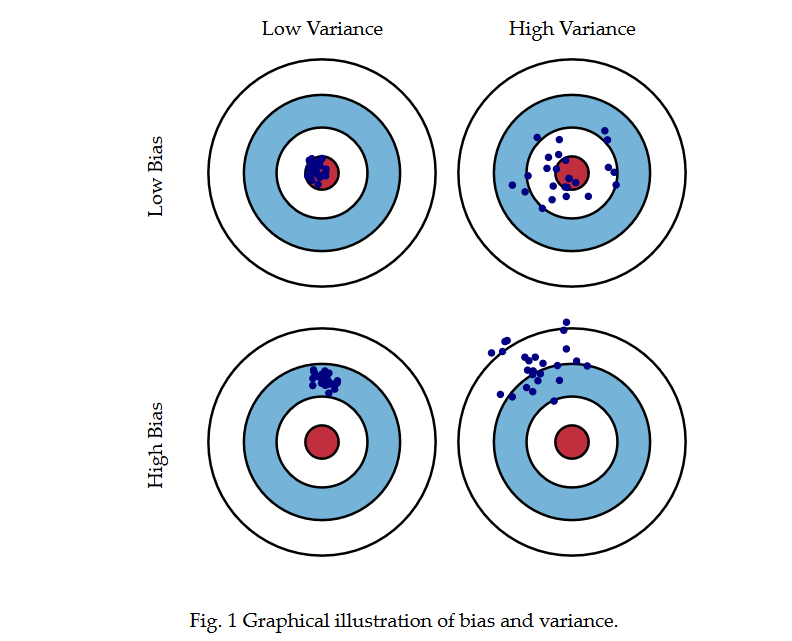


在实际应用中，我们做模型选择的一般方法是：

    选定一个算法；
    调整算法的超参数；
    以某种指标选择最合适的超参数组合。

也就是说，在整个过程中，我们固定训练样本，改变模型的描述能力（模型复杂度）。不难理解，随着模型复杂度的增加，其描述能力也就会增加；此时，模型在验证集上的表现，偏差会倾向于减小而方差会倾向于增大。而在相反方向，随着模型复杂度的降低，其描述能力也就会降低；此时，模型在验证集上的表现，偏差会倾向于增大而方差会倾向于减小。

最优位置，实际上是 total error 曲线的拐点。我们知道，连续函数的拐点意味着此处一阶导数的值为 0。考虑到 total error 是偏差与方差的加和，所以我们有，在拐点处：

\begin{equation} \newcommand{\dif}{\mathop{}\!\mathrm{d}} \frac{\dif\text{Bias}}{\dif\text{Complexity}} = - \frac{\dif\text{Variance}}{\dif\text{Complexity}} \label{eq:sweet} \end{equation}

若模型复杂度大于平衡点，则模型的方差会偏高，模型倾向于过拟合；若模型复杂度小于平衡点，则模型的偏差会偏高，模型倾向于过拟合。

    当模型处于欠拟合状态时，训练集和验证集上的误差都很高；
    当模型处于过拟合状态时，训练集上的误差低，而验证集上的误差会非常高。
**欠拟合**
当模型处于欠拟合状态时，根本的办法是增加模型复杂度：
* 增加模型的迭代次数；
* 更换描述能力更强的模型；
* 生成更多特征供训练使用；
* 降低正则化水平。

**过拟合**
当模型处于过拟合状态时，根本的办法是降低模型复杂度：
* 扩增训练集；
*   减少训练使用的特征的数量；
*   提高正则化水平。



泛化误差可分解为偏差、方差与噪声之和。
偏差度量了学习算法的期望预测与真实结果的偏离程度，即刻画了学习算法本身的拟合能力；方差度量了同样大小的训练集的变动所导致的学习性能的变化，即刻画了数据扰动所造成的影响；噪声则表达了在当前任务上任何学习算法所能达到的期望泛化误差的下界，即刻画了学习问题本身的难度。

偏差-方差分解说明，泛化性能是由学习算法的能力、数据的充分性以及学习任务本身的难度所共同决定的。给定学习任务，为了取得好的泛化性能，则需使偏差较小，既能够充分拟合数据，并且使方差较小，即使得数据扰动产生的影响小。

### 从Frequentist的model complexity理论：Bias-Variance trade-off，
以 linear basis function model 为例说明。  
(1)  Frequentist 基于给定的 data set D 对参数 w 进行 point estimate；  

(2) 不同的 data set D，估计出来的参数 w 可能不同，因而导致 y(x)不同，故可以把 D 对 y(x)的这种影响记作y(x; D)——换句话说，每个D对应了一个其所训练出来的模型y(x; D)；   

(3) 进行一个 thought experiment：假设有很多不同的 data sets，每个都是从 p(t, x)中采用出 来，并且每个 data set 含 N 个样本；  

(4) 考虑某个 data set D 所训练的模型 y(x; D)，那么： 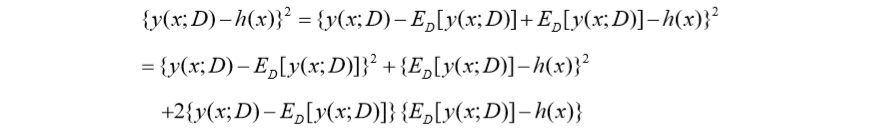

现在，可以 take the expectation of this expression with respect to D，得到： 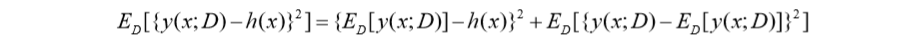
上面：第一项为 $bias^2$，表示的是 average prediction over all data sets 与 desired regression function（也就是最佳预测 h(x)）之间的差距，也就是说 average model 与 best model 的接近程度；第二项为 variance，表示的是在单个 data set上的预测模型y(x; D)在整体平均值$E[y(x; D)]$附近波动的程度（这本身其实就是一个方差），也就是说模型 y(x; D)对数据集 D 的选择的敏感度

 (5) 分解 expected loss：把 $E_D[{y(x;D)-h(x)}^2 ]$替换掉

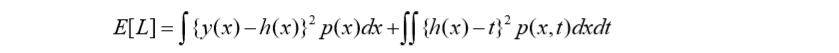
中的 ${y(x;D)-h(x)}^2 $，得到：$ Expected loss (E[L]) = (bias)^2 + variance + noise $其中： 

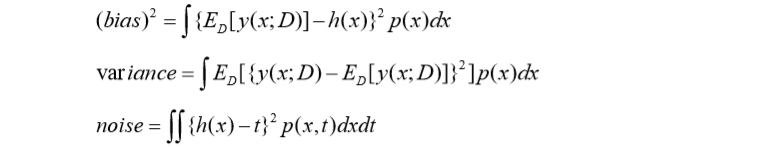
对于 regression，目标是找到函数 y(x)，使得期望损失 $E[L]$最小化；而 $E[L]$本身可 以分解开来，由 bias, variance 和 noise 构成。noise 是一个和 y(x)无关的量，也就是说与 regression做的好不好无关，是一个不可避免的量。而bias与variance则是一对矛盾量：flexible model 可以具有 low bias（average model 能够很接近 best model）， high variance（但是 single model 对 data set D 的选取很敏感），rigid model 则有 high bias，low variance。好的模型应该 在 bias 与 variance 之间达到一个折中。

### 从bayes角度看，Bayesian的model complexity理论：Model evidence/marginal likelihood


 (1) Bayesian 方法能够避免 over-fitting 的原因是：Marginalizing over the model parameters instead of making point estimates of their values. 
 
 (2) 假设有多个 model，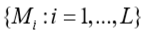 ；观察到的 data set 是 D。Bayesian 的 model comparison 方法是，比较各个模型的后验概率，即： 

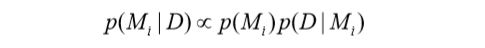
先验概率 $p(M_i)$ allows us to express a preference for different model。可以假设每个模型的 先验概率相等，那么剩下要比较的关键是： $p(D|M_i)$——model evidence 或 marginal likelihood。 

 (3) Model averaging V.S. model selection   Model averaging：把多个模型，用各自模型的后验概率加权平均，得到 predictive distribution
为

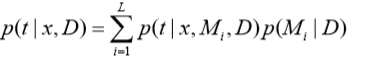
Model selection：只选择一个模型，即其中后验概率最大的模型。这是一种 approximation to model averaging。  

以上分析可以看出，各个 model 的后验概率是关键，而计算后验概率的关键又是 model evidence。

 (4) Model evidence：又叫做 marginal likelihood。之所以这么叫，是因为它的计算/定义： 

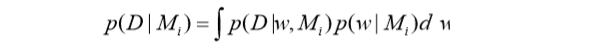
其中涉及到把 w 进行 marginalize。      从 sampling 的角度看，$M_i$ 相当于 hyper-parameter，而 w 则是 parameter。一个 model 不 同于另一个 model，是因为 hyper-parameter。例如：在多项式做 basis function 的 curve fitting 中，多项式的阶 M 就是一个 hyper-parameter，确定一个 M 值（多项式的阶）就是确定了一 个model。在取定一个阶M后，参数w还有无数种取值可能；把这些取值可能进行marginalize， 得到的就是 model evidence，即由阶为 M 的多项式 model 生成当前所观察到的数据集 D 的 概率。 